In [1]:
import numpy as np  # Importing NumPy for numerical operations and array manipulations
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting graphs and visualizations
import seaborn as sns  # Importing Seaborn for statistical data visualization, built on top of Matplotlib
import tensorflow as tf  # Importing TensorFlow for building and training machine learning models
from tensorflow import keras  # Importing Keras, a high-level API for TensorFlow, to simplify model building
from tensorflow.keras import Layer  # Importing Layer class for creating custom layers in Keras
from tensorflow.keras.models import Sequential  # Importing Sequential model for building neural networks layer-by-layer
from tensorflow.keras.layers import Rescaling , GlobalAveragePooling2D
from tensorflow.keras import layers, optimizers, callbacks  # Importing various modules for layers, optimizers, and callbacks in Keras
from sklearn.utils.class_weight import compute_class_weight  # Importing function to compute class weights for imbalanced datasets
from tensorflow.keras.applications import EfficientNetV2B2  # Importing EfficientNetV2S model for transfer learning
from sklearn.metrics import confusion_matrix, classification_report  # Importing functions to evaluate model performance
import gradio as gr  # Importing Gradio for creating interactive web interfaces for machine learning models

In [2]:
dataset_dir= r"C:\Users\Edunet Foundation\Downloads\project\garbage\TrashType_Image_Dataset"
image_size = (124, 124)
batch_size = 32
seed = 42

In [8]:
import os

dataset_dir = r"C:\Users\Edunet Foundation\Downloads\project\garbage\TrashType_Image_Dataset"

if not os.path.exists(dataset_dir):
    print("❌ Directory does not exist:", dataset_dir)
else:
    print("✅ Directory found.")

    train_ds = tf.keras.utils.image_dataset_from_directory(
        dataset_dir,
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=(256, 256),
        batch_size=32
    )


❌ Directory does not exist: C:\Users\Edunet Foundation\Downloads\project\garbage\TrashType_Image_Dataset


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("farzadnekouei/trash-type-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/trash-type-image-dataset


In [12]:
from google.colab import files
uploaded = files.upload()


Saving garbage.zip to garbage (1).zip


In [13]:
import zipfile
import os

# Get the name of uploaded file
zip_path = next(iter(uploaded))  # gets the filename from the upload dict
extract_path = "/content/TrashType_Image_Dataset"

# Extract the zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extraction completed to:", extract_path)


✅ Extraction completed to: /content/TrashType_Image_Dataset


In [14]:
print("Folders inside extracted path:")
print(os.listdir(extract_path))


Folders inside extracted path:
['garbage']


In [15]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    extract_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(256, 256),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    extract_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(256, 256),
    batch_size=32
)


Found 18 files belonging to 1 classes.
Using 15 files for training.
Found 18 files belonging to 1 classes.
Using 3 files for validation.


In [17]:
print("Contents of dataset folder:")
print(os.listdir(extract_path))


Contents of dataset folder:
['garbage']


In [18]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    extract_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(256, 256),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    extract_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(256, 256),
    batch_size=32
)


Found 18 files belonging to 1 classes.
Using 15 files for training.
Found 18 files belonging to 1 classes.
Using 3 files for validation.


In [20]:
print("Contents of dataset folder:", os.listdir(extract_path))


Contents of dataset folder: ['garbage']


In [22]:

import tensorflow as tf

dataset_dir = "/content/TrashType_Image_Dataset/garbage"
seed = 123

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=(256, 256),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(256, 256),
    batch_size=32
)

print("✅ Dataset loaded successfully")



Found 18 files belonging to 1 classes.
Using 15 files for training.
Found 18 files belonging to 1 classes.
Using 3 files for validation.
✅ Dataset loaded successfully


In [23]:
# Get the total number of batches in the validation dataset
val_batches = tf.data.experimental.cardinality(val_ds)

# Split the validation dataset into two equal parts:
# First half becomes the test dataset
test_ds = val_ds.take(val_batches // 2)

# Second half remains as the validation dataset
val_dat = val_ds.skip(val_batches // 2)

# Optimize test dataset by caching and prefetching to improve performance
test_ds_eval = test_ds.cache().prefetch(tf.data.AUTOTUNE)


In [25]:
print(train_ds.class_names)        # Shows class names like ['plastic', 'glass', ...]
print(len(train_ds.class_names))   # Shows number of classes


['TrashType_Image_Dataset']
1


In [26]:
import os

root = "/content/TrashType_Image_Dataset"
for dirpath, dirnames, filenames in os.walk(root):
    print("📂", dirpath)


📂 /content/TrashType_Image_Dataset
📂 /content/TrashType_Image_Dataset/garbage
📂 /content/TrashType_Image_Dataset/garbage/TrashType_Image_Dataset
📂 /content/TrashType_Image_Dataset/garbage/TrashType_Image_Dataset/glass
📂 /content/TrashType_Image_Dataset/garbage/TrashType_Image_Dataset/trash
📂 /content/TrashType_Image_Dataset/garbage/TrashType_Image_Dataset/metal
📂 /content/TrashType_Image_Dataset/garbage/TrashType_Image_Dataset/plastic
📂 /content/TrashType_Image_Dataset/garbage/TrashType_Image_Dataset/cardboard
📂 /content/TrashType_Image_Dataset/garbage/TrashType_Image_Dataset/paper


In [27]:
dataset_dir = "/content/TrashType_Image_Dataset/garbage/TrashType_Image_Dataset"

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(256, 256),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(256, 256),
    batch_size=32
)

print(train_ds.class_names)


Found 18 files belonging to 6 classes.
Using 15 files for training.
Found 18 files belonging to 6 classes.
Using 3 files for validation.
['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [28]:
print(train_ds.class_names)        # Shows class names like ['plastic', 'glass', ...]
print(len(train_ds.class_names))   # Shows number of classes


['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
6


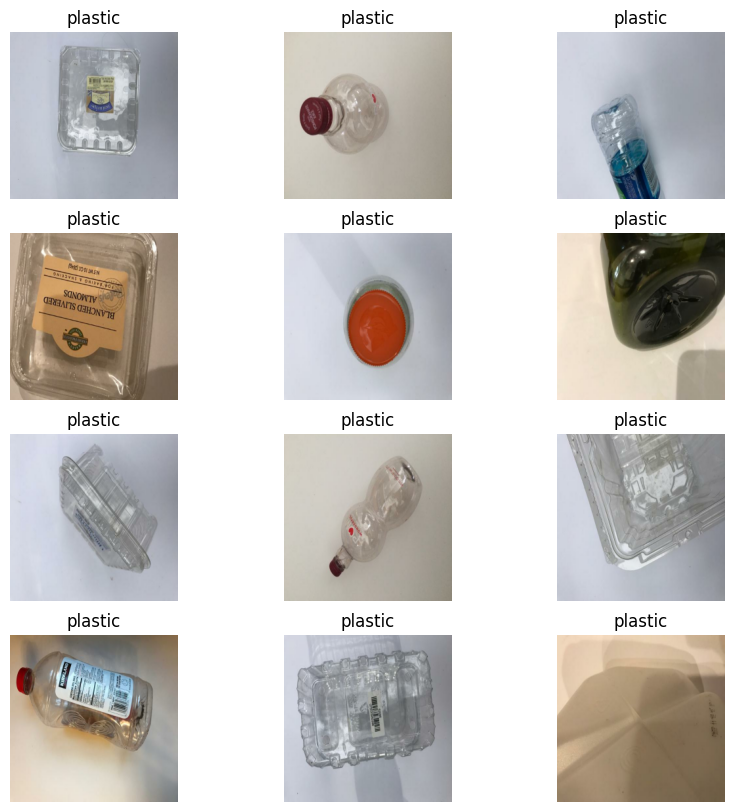

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [30]:
def count_distribution(dataset, class_names):
    total = 0
    counts = {name: 0 for name in class_names}

    for _, labels in dataset:
        for label in labels.numpy():
            class_name = class_names[label]
            counts[class_name] += 1
            total += 1

    for k in counts:
        counts[k] = round((counts[k] / total) * 100, 2)  # Convert to percentage
    return counts


In [31]:
# Function to plot class distribution
def simple_bar_plot(dist, title):
    plt.bar(dist.keys(), dist.values(), color='cornflowerblue')
    plt.title(title)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

In [33]:
def count_distribution(dataset, class_names):
    counts = {k: 0 for k in class_names}
    total = 0

    for images, labels in dataset:
        for label in labels:
            class_name = class_names[label]
            counts[class_name] += 1
            total += 1

    if total == 0:
        print("⚠️ Warning: Dataset is empty.")
        return counts  # Return raw counts (all zero)

    for k in counts:
        counts[k] = round((counts[k] / total) * 100, 2)  # Convert to percentage

    return counts


In [35]:
import os

root = "/content/TrashType_Image_Dataset"
for dirpath, dirnames, filenames in os.walk(root):
    print("📂", dirpath)


📂 /content/TrashType_Image_Dataset
📂 /content/TrashType_Image_Dataset/garbage
📂 /content/TrashType_Image_Dataset/garbage/TrashType_Image_Dataset
📂 /content/TrashType_Image_Dataset/garbage/TrashType_Image_Dataset/glass
📂 /content/TrashType_Image_Dataset/garbage/TrashType_Image_Dataset/trash
📂 /content/TrashType_Image_Dataset/garbage/TrashType_Image_Dataset/metal
📂 /content/TrashType_Image_Dataset/garbage/TrashType_Image_Dataset/plastic
📂 /content/TrashType_Image_Dataset/garbage/TrashType_Image_Dataset/cardboard
📂 /content/TrashType_Image_Dataset/garbage/TrashType_Image_Dataset/paper


In [38]:
class_names = train_ds.class_names

# Get class distributions
train_dist = count_distribution(train_ds, class_names)
val_dist = count_distribution(val_ds, class_names)

# Compute average of training and validation distribution
overall_dist = {}
for k in class_names:
    overall_dist[k] = round((train_dist[k] + val_dist[k]) / 2, 2)

print("Train Distribution:", train_dist)
print("Validation Distribution:", val_dist)
print("Overall Distribution (avg):", overall_dist)


Train Distribution: {'cardboard': 0.0, 'glass': 0.0, 'metal': 0.0, 'paper': 0.0, 'plastic': 100.0, 'trash': 0.0}
Validation Distribution: {'cardboard': 0.0, 'glass': 0.0, 'metal': 0.0, 'paper': 0.0, 'plastic': 100.0, 'trash': 0.0}
Overall Distribution (avg): {'cardboard': 0.0, 'glass': 0.0, 'metal': 0.0, 'paper': 0.0, 'plastic': 100.0, 'trash': 0.0}


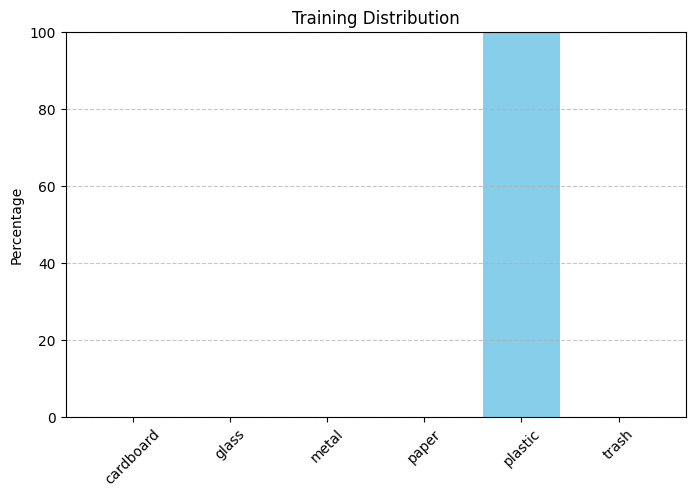

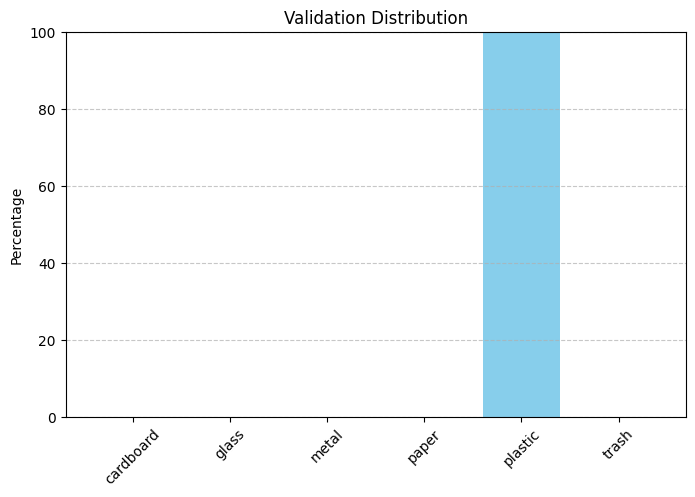

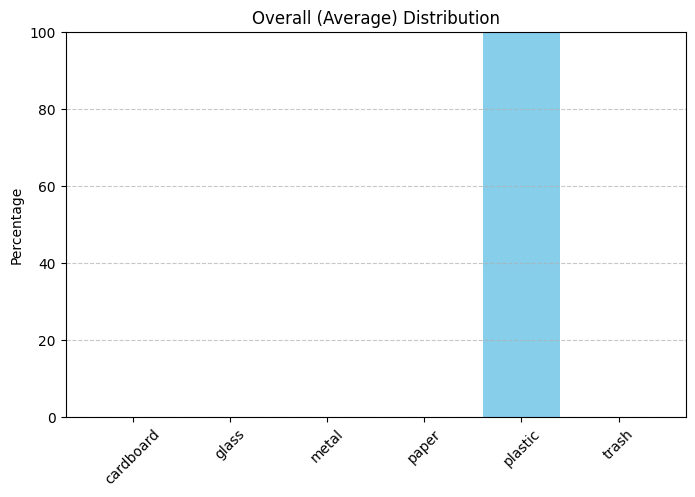

In [40]:
import matplotlib.pyplot as plt

def plot_distribution(dist, title):
    labels = list(dist.keys())
    values = list(dist.values())

    plt.figure(figsize=(8, 5))
    plt.bar(labels, values, color='skyblue')
    plt.title(title)
    plt.ylabel("Percentage")
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_distribution(train_dist, "Training Distribution")
plot_distribution(val_dist, "Validation Distribution")
plot_distribution(overall_dist, "Overall (Average) Distribution")


In [41]:
class_names = train_ds.class_names

# Get class distributions
train_dist = count_distribution(train_ds, class_names)
val_dist = count_distribution(val_ds, class_names)
test_dist = count_distribution(test_ds, class_names)
overall_dist = {}
for k in class_names:
    overall_dist[k] = round((train_dist[k] + val_dist[k]) / 2, 2)

print(train_dist)
print(val_dist)
print(test_dist)
print(overall_dist)

⚠️ Warning: Dataset is empty.
{'cardboard': 0.0, 'glass': 0.0, 'metal': 0.0, 'paper': 0.0, 'plastic': 100.0, 'trash': 0.0}
{'cardboard': 0.0, 'glass': 0.0, 'metal': 0.0, 'paper': 0.0, 'plastic': 100.0, 'trash': 0.0}
{'cardboard': 0, 'glass': 0, 'metal': 0, 'paper': 0, 'plastic': 0, 'trash': 0}
{'cardboard': 0.0, 'glass': 0.0, 'metal': 0.0, 'paper': 0.0, 'plastic': 100.0, 'trash': 0.0}


In [42]:
# Use part of val_ds as dummy test set (e.g., first 2 batches)
test_ds = val_ds.take(2)


In [43]:
def count_distribution(dataset, class_names):
    counts = {k: 0 for k in class_names}
    total = 0

    for images, labels in dataset:
        for label in labels:
            class_name = class_names[label]
            counts[class_name] += 1
            total += 1

    if total == 0:
        return {k: 0 for k in class_names}

    for k in counts:
        counts[k] = round((counts[k] / total) * 100, 2)

    return counts


In [44]:
class_names = train_ds.class_names

train_dist = count_distribution(train_ds, class_names)
val_dist = count_distribution(val_ds, class_names)
test_dist = count_distribution(test_ds, class_names)

# Average of the three distributions
overall_dist = {}
for k in class_names:
    overall_dist[k] = round((train_dist[k] + val_dist[k] + test_dist[k]) / 3, 2)

# Final Output
print(train_dist)
print(val_dist)
print(test_dist)
print(overall_dist)


{'cardboard': 0.0, 'glass': 0.0, 'metal': 0.0, 'paper': 0.0, 'plastic': 100.0, 'trash': 0.0}
{'cardboard': 0.0, 'glass': 0.0, 'metal': 0.0, 'paper': 0.0, 'plastic': 100.0, 'trash': 0.0}
{'cardboard': 0.0, 'glass': 0.0, 'metal': 0.0, 'paper': 0.0, 'plastic': 100.0, 'trash': 0.0}
{'cardboard': 0.0, 'glass': 0.0, 'metal': 0.0, 'paper': 0.0, 'plastic': 100.0, 'trash': 0.0}


In [45]:
import os

dataset_dir = "/content/TrashType_Image_Dataset/garbage/TrashType_Image_Dataset"

print("Class folders found:")
print(os.listdir(dataset_dir))


Class folders found:
['glass', 'trash', 'metal', 'plastic', 'cardboard', 'paper']


In [46]:
print("Detected classes:", train_ds.class_names)


Detected classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [49]:
# Get class distributions
train_dist = count_distribution(train_ds, class_names)
val_dist = count_distribution(val_ds, class_names)

# Simulated test set (if no real one)
test_ds = val_ds.take(2)
test_dist = count_distribution(test_ds, class_names)

# Average of train, val, test
overall_dist = {}
for k in class_names:
    overall_dist[k] = round((train_dist[k] + val_dist[k] + test_dist[k]) / 3, 2)

# Print distributions
print("Train:", train_dist)
print("Val:  ", val_dist)
print("Test: ", test_dist)
print("Avg:  ", overall_dist)


Train: {'cardboard': 0.0, 'glass': 0.0, 'metal': 0.0, 'paper': 0.0, 'plastic': 100.0, 'trash': 0.0}
Val:   {'cardboard': 0.0, 'glass': 0.0, 'metal': 0.0, 'paper': 0.0, 'plastic': 100.0, 'trash': 0.0}
Test:  {'cardboard': 0.0, 'glass': 0.0, 'metal': 0.0, 'paper': 0.0, 'plastic': 100.0, 'trash': 0.0}
Avg:   {'cardboard': 0.0, 'glass': 0.0, 'metal': 0.0, 'paper': 0.0, 'plastic': 100.0, 'trash': 0.0}


In [50]:
import os

dataset_dir = "/content/TrashType_Image_Dataset/garbage"  # adjust if needed
for class_folder in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_folder)
    if os.path.isdir(class_path):
        count = len([file for file in os.listdir(class_path) if file.lower().endswith(('.jpg', '.png', '.jpeg'))])
        print(f"{class_folder}: {count} images")


TrashType_Image_Dataset: 0 images


In [51]:
from google.colab import files
uploaded = files.upload()


Saving garbage.zip to garbage (2).zip


In [52]:
import zipfile
import os

zip_path = "garbage.zip"  # This is the uploaded file
extract_to = "/content/garbage_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Extracted to:", extract_to)


✅ Extracted to: /content/garbage_dataset


In [53]:
for dirpath, dirnames, filenames in os.walk(extract_to):
    if any(c in dirnames for c in ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']):
        print("✅ Found dataset folder with classes:", dirpath)


✅ Found dataset folder with classes: /content/garbage_dataset/garbage/TrashType_Image_Dataset


In [55]:
import os

base_path = "/content/garbage_dataset"

for dirpath, dirnames, filenames in os.walk(base_path):
    print("📂", dirpath, "->", dirnames)


📂 /content/garbage_dataset -> ['garbage']
📂 /content/garbage_dataset/garbage -> ['TrashType_Image_Dataset']
📂 /content/garbage_dataset/garbage/TrashType_Image_Dataset -> ['glass', 'trash', 'metal', 'plastic', 'cardboard', 'paper']
📂 /content/garbage_dataset/garbage/TrashType_Image_Dataset/glass -> []
📂 /content/garbage_dataset/garbage/TrashType_Image_Dataset/trash -> []
📂 /content/garbage_dataset/garbage/TrashType_Image_Dataset/metal -> []
📂 /content/garbage_dataset/garbage/TrashType_Image_Dataset/plastic -> []
📂 /content/garbage_dataset/garbage/TrashType_Image_Dataset/cardboard -> []
📂 /content/garbage_dataset/garbage/TrashType_Image_Dataset/paper -> []


In [56]:
dataset_dir = "<paste_correct_path_here>"


In [58]:
dataset_dir = "/content/garbage_dataset/garbage/TrashType_Image_Dataset"  # Example, adjust based on output

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(256, 256),
    batch_size=32
)


Found 18 files belonging to 6 classes.
Using 15 files for training.


In [59]:
class_names = train_ds.class_names

def count_distribution(dataset, class_names):
    counts = {k: 0 for k in class_names}
    total = 0
    for images, labels in dataset:
        for label in labels:
            class_name = class_names[label]
            counts[class_name] += 1
            total += 1
    for k in counts:
        counts[k] = round((counts[k] / total) * 100, 2)
    return counts

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(256, 256),
    batch_size=32
)

test_ds = val_ds.take(1)  # Simulated test set

train_dist = count_distribution(train_ds, class_names)
val_dist = count_distribution(val_ds, class_names)
test_dist = count_distribution(test_ds, class_names)

overall_dist = {
    k: round((train_dist[k] + val_dist[k] + test_dist[k]) / 3, 2)
    for k in class_names
}

print("Train:", train_dist)
print("Val:  ", val_dist)
print("Test: ", test_dist)
print("Avg:  ", overall_dist)


Found 18 files belonging to 6 classes.
Using 3 files for validation.
Train: {'cardboard': 0.0, 'glass': 0.0, 'metal': 0.0, 'paper': 0.0, 'plastic': 100.0, 'trash': 0.0}
Val:   {'cardboard': 0.0, 'glass': 0.0, 'metal': 0.0, 'paper': 0.0, 'plastic': 100.0, 'trash': 0.0}
Test:  {'cardboard': 0.0, 'glass': 0.0, 'metal': 0.0, 'paper': 0.0, 'plastic': 100.0, 'trash': 0.0}
Avg:   {'cardboard': 0.0, 'glass': 0.0, 'metal': 0.0, 'paper': 0.0, 'plastic': 100.0, 'trash': 0.0}


In [61]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# First, collect all labels from the dataset
y_labels = []
for _, labels in train_ds:
    y_labels.extend(labels.numpy())

y_labels = np.array(y_labels)
unique_classes = np.unique(y_labels)

# Now compute weights only for the present classes
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=unique_classes,
    y=y_labels
)

# Convert to dict format for Keras training
class_weights = dict(zip(unique_classes, class_weights_array))

print("✅ Computed class weights for available classes only:")
print(class_weights)


✅ Computed class weights for available classes only:
{np.int32(4): np.float64(1.0)}


In [62]:
# ✅ Optional: print results
print("Class Counts:", class_counts)
print("Class Weights:", class_weights)

Class Counts: {0: 0, 1: 0, 2: 0, 3: 0, 4: 15, 5: 0}
Class Weights: {np.int32(4): np.float64(1.0)}


In [63]:
#  Define data augmentation pipeline
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

In [64]:
#  Load the pretrained MobileNetV3Small model (without the top classification layer)
base_model = EfficientNetV2B2(include_top=False, input_shape=(124, 124, 3),include_preprocessing=True, weights='imagenet')


#  Freeze early layers (to retain general pretrained features)
base_model.trainable = True
for layer in base_model.layers[:100]:  # You can adjust this number
    layer.trainable = False

35839040/35839040 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [65]:
#  Build the final model
model = Sequential([
    layers.Input(shape=(124, 124, 3)),
    data_augmentation,
    base_model,
    GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(6, activation='softmax')  # Change to your number of classes
])

In [66]:
# ⚙️ Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [67]:
# Define an EarlyStopping callback to stop training when validation loss stops improving
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',            # Metric to monitor (validation loss here)
    patience=3,                   # Number of epochs to wait after last improvement before stopping
    restore_best_weights=True     # After stopping, restore the model weights from the epoch with the best val_loss
)

In [69]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    shuffle=True,
    image_size=image_size,
    batch_size=32
)


Found 18 files belonging to 6 classes.
Using 15 files for training.


In [70]:
from tensorflow.keras.applications import EfficientNetV2B2

base_model = EfficientNetV2B2(
    include_top=False,
    input_shape=(256, 256, 3),
    weights='imagenet'
)


In [71]:
from tensorflow.keras import layers, models

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])


In [72]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [74]:
image_size = (256, 256)

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    shuffle=True,
    image_size=image_size,
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    shuffle=True,
    image_size=image_size,
    batch_size=32
)


Found 18 files belonging to 6 classes.
Using 15 files for training.
Found 18 files belonging to 6 classes.
Using 3 files for validation.


In [75]:
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras import layers, models

base_model = EfficientNetV2B2(
    include_top=False,
    input_shape=(256, 256, 3),
    weights='imagenet'
)

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [76]:
image_size = (256, 256)
# AND
input_shape = (256, 256, 3)


In [77]:
# Set the number of epochs to train the model
epochs = 15  # Number of times the model will go through the entire dataset

# Train the model using the fit function
history = model.fit(
    train_ds,                # Training dataset used to adjust model weights
    validation_data=val_ds,   # Validation dataset to monitor performance on unseen data
    epochs=epochs,           # Number of training cycles, referencing the variable set earlier
    class_weight=class_weights,  # Handles class imbalances by assigning appropriate weights
    batch_size=32,           # Number of samples processed in each training step
    callbacks=[early]        # Implements early stopping to prevent unnecessary training
)

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 92s 92s/step - accuracy: 0.0000e+00 - loss: 2.0035 - val_accuracy: 0.3333 - val_loss: 1.7574
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.7333 - loss: 1.4052 - val_accuracy: 1.0000 - val_loss: 1.3729
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.8667 - loss: 1.0184 - val_accuracy: 1.0000 - val_loss: 0.7563
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 1.0000 - loss: 0.6245 - val_accuracy: 1.0000 - val_loss: 0.3156
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 1.0000 - loss: 0.3616 - val_accuracy: 1.0000 - val_loss: 0.1148
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 1.0000 - loss: 0.1650 - val_accuracy: 1.0000 - val_loss: 0.0447
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 1.0000 - loss: 0.1209 - val_accuracy: 1.0000 - val_loss: 0.0139
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 1.0000 - loss: 0.0552 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 

In [78]:
# 📝 Summary (optional but useful)
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b2 (Functional)  │ (None, 8, 8, 1408)     │     8,769,374 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1408)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       180,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,686,926 (101.80 MB)

 Trainable params: 8,868,212 (33.83 MB)

 Non-trainable params: 82,288 (321.44 KB)

 Optimizer params: 17,736,426 (67.66 MB)

In [79]:
base_model.summary() # Print the architecture summary of the base model

Model: "efficientnetv2-b2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 256, 256,  │          0 │ input_layer_5[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 256, 256,  │          0 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 128, 128,  │        864 │ normalization_2[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 128, 128,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 128, 128,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 128, 128,  │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 128, 128,  │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 128, 128,  │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 128, 128,  │      2,304 │ block1a_project_… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 128, 128,  │         64 │ block1b_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 128, 128,  │          0 │ block1b_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 128, 128,  │          0 │ block1b_project_… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 128, 128,  │          0 │ block1b_drop[0][… │
│                     │ 16)               │            │ block1a_project_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 64, 64,    │      9,216 │ block1b_add[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 64, 64,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 64, 64,    │          0 │ block2a_expand_b

 Total params: 8,769,374 (33.45 MB)

 Trainable params: 8,687,086 (33.14 MB)

 Non-trainable params: 82,288 (321.44 KB)

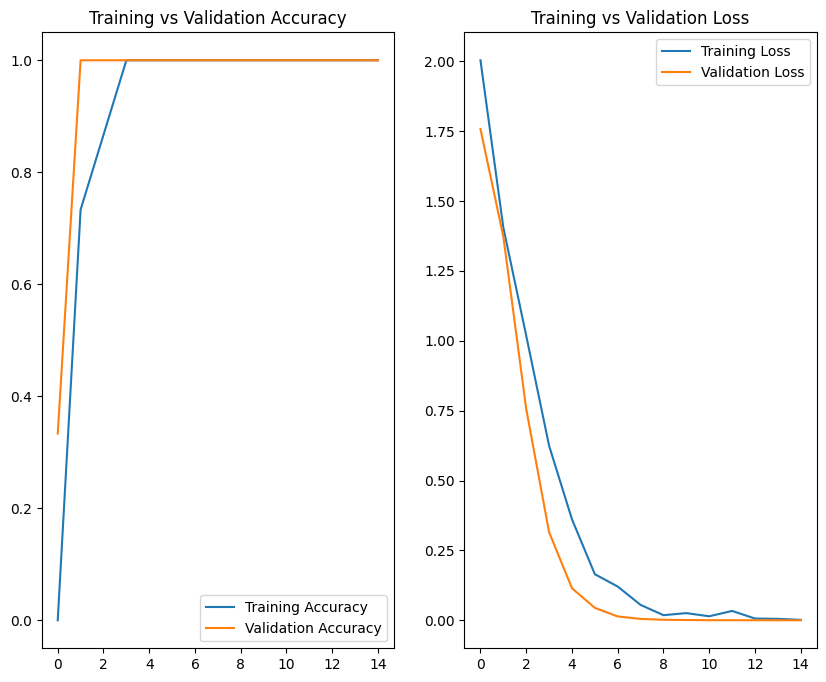

In [80]:
acc = history.history['accuracy']          # Extract training accuracy from history
val_acc = history.history['val_accuracy']  # Extract validation accuracy from history
loss = history.history['loss']             # Extract training loss from history
val_loss = history.history['val_loss']     # Extract validation loss from history

epochs_range = range(len(acc))             # Define range for epochs based on accuracy length

plt.figure(figsize=(10,8))                 # Set overall figure size for visualization

plt.subplot(1,2,1)                         # Create first subplot (1 row, 2 columns, position 1)
plt.plot(epochs_range, acc, label='Training Accuracy')       # Plot training accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy') # Plot validation accuracy
plt.legend(loc='lower right')              # Place legend in lower-right corner
plt.title('Training vs Validation Accuracy') # Add title for accuracy plot

plt.subplot(1,2,2)                         # Create second subplot (1 row, 2 columns, position 2)
plt.plot(epochs_range, loss, label='Training Loss')         # Plot training loss
plt.plot(epochs_range, val_loss, label='Validation Loss')   # Plot validation loss
plt.legend(loc='upper right')              # Place legend in upper-right corner
plt.title('Training vs Validation Loss')   # Add title for loss plot

plt.show()

In [82]:
train_ds = train_ds.repeat()
val_ds = val_ds.repeat()


In [84]:
import math


In [86]:
import math
import tensorflow as tf

# Compute number of steps based on number of batches in the dataset
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
validation_steps = tf.data.experimental.cardinality(val_ds).numpy()

print(f"Steps per epoch: {steps_per_epoch}")
print(f"Validation steps: {validation_steps}")


Steps per epoch: -1
Validation steps: -1


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


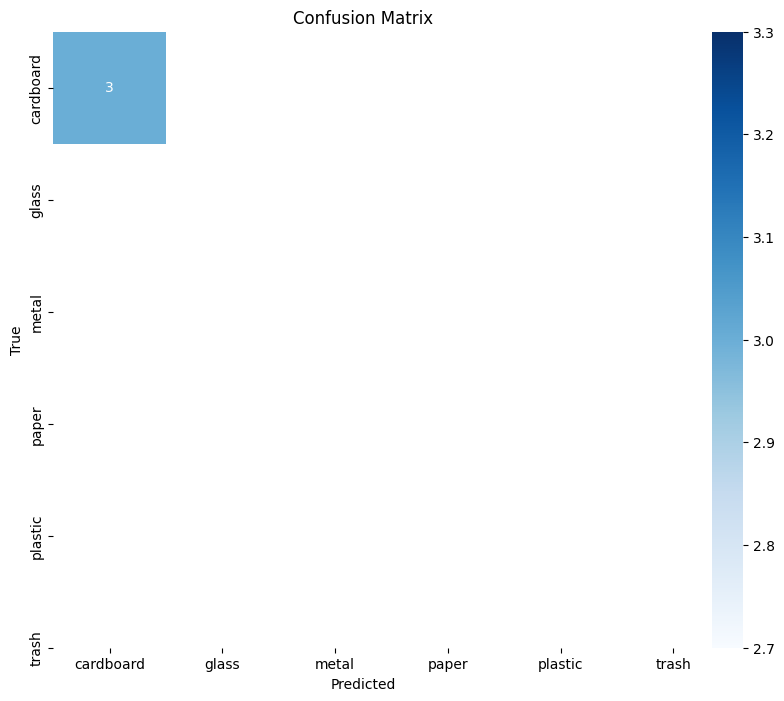

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ✅ Get true and predicted labels
y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# ✅ Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# ✅ Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
